# Section 2.2 — Multiple random variable

This notebook contains all the code examples from [Section 2.2 Multiple random variables]() in the **No Bullshit Guide to Statistics**.



#### Notebook setup

In [1]:
# load Python modules
import numpy as np               # numerical calculations
import matplotlib.pyplot as plt  # generic plotting functions
import seaborn as sns            # plotting distributions

In [2]:
# Figures setup
sns.set_theme(
    context="paper",
    style="whitegrid",
    palette="colorblind",
    rc={'figure.figsize': (7,4)},
)
%config InlineBackend.figure_format = 'retina'

import os
DESTDIR = "figures/prob"  # where to save figures

In [3]:
# set random seed for repeatability
np.random.seed(42)

## Definitions

#### Example 1: two coin tosses

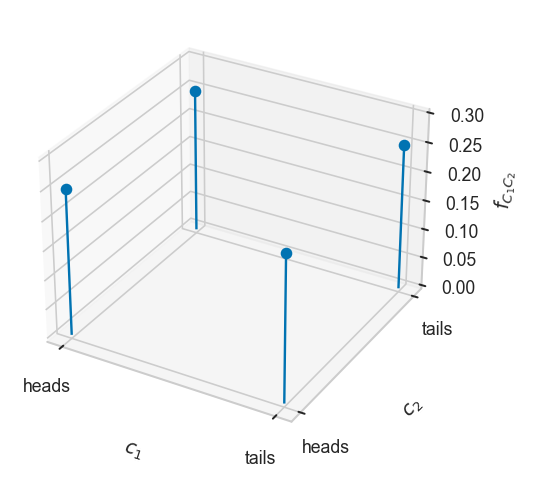

In [4]:
def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

def fC1C2(c1,c2):
    return fC(c1)*fC(c2)

xs, ys, fXYs = [], [], []
map_int_to_label = {0: "heads", 1: "tails"}
for x in range(0,1+1):
    for y in range(0,1+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fC1C2(map_int_to_label[x], map_int_to_label[y])
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xticks([0,1])
ax.set_xticklabels(["heads", "tails"])
ax.set_yticks([0,1])
ax.set_yticklabels(["heads", "tails"])
ax.set_xlabel("$c_1$")
ax.set_ylabel("$c_2$")
ax.set_zlabel("$f_{C_1C_2}$")
ax.set_zlim([0, 0.3])

# save fig...
filename = os.path.join(DESTDIR, "example1__joint_pmf_of_two_coin_tosses.pdf")
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Example 2: rolling two dice

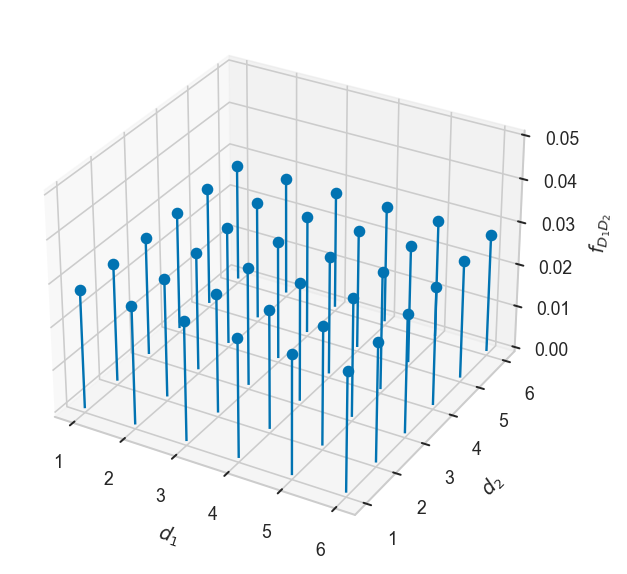

In [5]:
def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

def fD1D2(d1,d2):
    return fD(d1)*fD(d2)

xs, ys, fXYs = [], [], []
for x in range(1,6+1):
    for y in range(1,6+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fD1D2(x,y)
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xlabel("$d_1$")
ax.set_ylabel("$d_2$")
ax.set_zlabel("$f_{D_1D_2}$")
ax.set_zlim([0, 0.05])

# save fig...
filename = os.path.join(DESTDIR, "example2__joint_pmf_of_two_die_rolls.pdf")
fig.tight_layout()
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

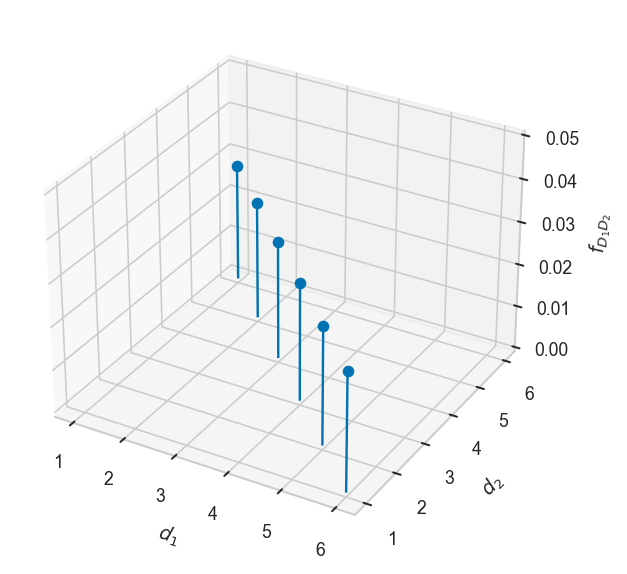

In [6]:
# PLOT D_1 + D_2 = 7
xs, ys, fXYs = [], [], []
for x in range(1,6+1):
    y = 7 - x
    xs.append(x)
    ys.append(y)
    fXYxy = fD1D2(x,y)
    fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xlabel("$d_1$")
ax.set_ylabel("$d_2$")
ax.set_zlabel("$f_{D_1D_2}$")
ax.set_zlim([0, 0.05])

# save fig...
filename = os.path.join(DESTDIR, "example2__joint_pmf_of_two_die_rolls_sum_7.pdf")
fig.tight_layout()
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

#### Example 3: coin-dependent dice roll

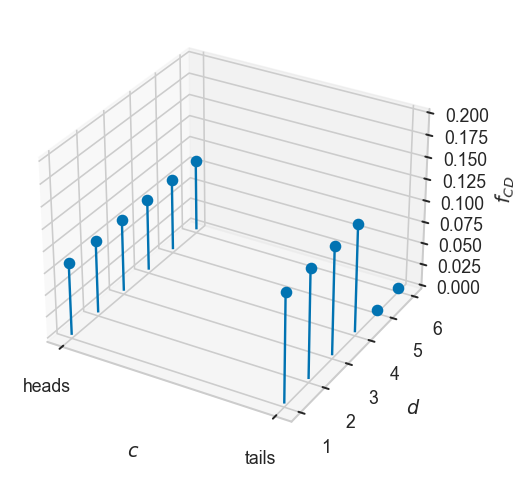

In [7]:
def fC(c):
    if c in {"heads", "tails"}:
        return 1/2
    else:
        return 0

def fD(d):
    if d in {1,2,3,4,5,6}:
        return 1/6
    else:
        return 0

def fD4(d):
    if d in {1,2,3,4}:
        return 1/4
    else:
        return 0

def fCD(c,d):
    if c == "heads":
        return fC(c)*fD(d)
    elif c == "tails":
        return fC(c)*fD4(d)


xs, ys, fXYs = [], [], []
map_int_to_label = {0: "heads", 1: "tails"}
for x in range(0,1+1):
    for y in range(1,6+1):
        xs.append(x)
        ys.append(y)
        fXYxy = fCD(map_int_to_label[x],y)
        fXYs.append(fXYxy)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(xs, ys, fXYs, basefmt=" ")
ax.set_xticks([0,1])
ax.set_xticklabels(["heads", "tails"])
ax.set_xlabel("$c$")
ax.set_ylabel("$d$")
ax.set_zlabel("$f_{CD}$")
ax.set_zlim([0, 0.2])

# save fig...
filename = os.path.join(DESTDIR, "example3__joint_pmf_of_coin_depended_die_roll.pdf")
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [8]:
fXYs

[0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.08333333333333333,
 0.125,
 0.125,
 0.125,
 0.125,
 0.0,
 0.0]

#### Example 4: blood test

In [9]:
def fV(v):
    if v == 1:
        return 0.03
    elif v == 0:
        return 0.97

def fTgivenV1(t):
    if t == 1:
        return 0.90
    elif t == 0:
        return 0.10

def fTgivenV0(t):
    if t == 1:
        return 0.20
    elif t == 0:
        return 0.80

def fTgivenV(t,v):
    if v == 1:
        return fTgivenV1(t)
    elif v == 0:
        return fTgivenV0(t)

def fVT(v,t):
    return fV(v)*fTgivenV(t,v)

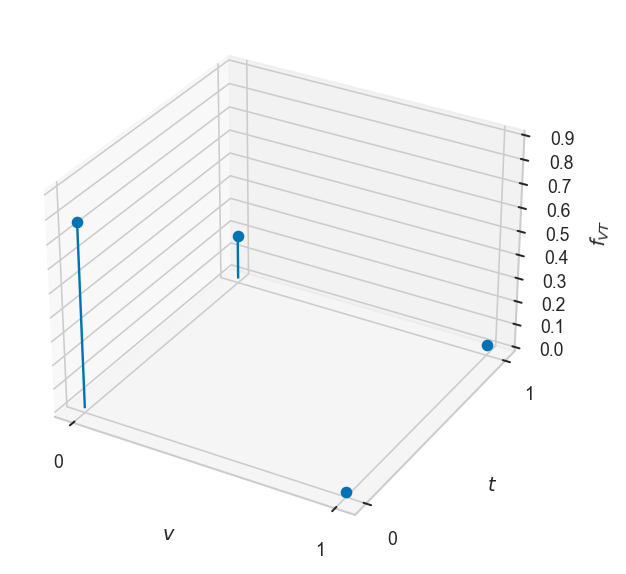

In [10]:
vs, ts, fVTs = [], [], []
for v in range(0,1+1):
    for t in range(0,1+1):
        vs.append(v)
        ts.append(t)
        fVTvt = fVT(v,t)
        fVTs.append(fVTvt)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.stem(vs, ts, fVTs, basefmt=" ", bottom=0.0)
ax.set_xticks([0,1])
ax.set_xlabel("$v$")
ax.set_yticks([0,1])
ax.set_ylabel("$t$")
ax.set_zlabel("$f_{VT}$")
ax.set_zlim([0, 0.9])

# save fig...
filename = os.path.join(DESTDIR, "example4__joint_pmf_of_virus_detecting_blood_test.pdf")
fig.tight_layout()
fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)

In [11]:
# f_T(0) = 
0.8* 0.97 + 0.10 *.03

0.779

In [12]:
# f_T(1) = 
0.2* 0.97 + 0.90 *.03

0.221

In [13]:
for t in range(0,1+1):
    fVTt = fVT(0,t) + fVT(1,t)
    print("Pr({T="+str(t)+"}) =", fVTt)

Pr({T=0}) = 0.779
Pr({T=1}) = 0.221


In [14]:
for v in range(0,1+1):
    for t in range(0,1+1):
        fVTvt = fVT(v,t)
        print("Pr({V="+str(v) + ",T="+str(t)+"}) =",
              fTgivenV(t,v), "*", fV(v), "=", fVTvt)

Pr({V=0,T=0}) = 0.8 * 0.97 = 0.776
Pr({V=0,T=1}) = 0.2 * 0.97 = 0.194
Pr({V=1,T=0}) = 0.1 * 0.03 = 0.003
Pr({V=1,T=1}) = 0.9 * 0.03 = 0.027


## Define datasets for the examples

### Example 1: Multivariable uniform

In [15]:
xmin = 0
xmax = 100
ymin = 0
ymax = 10

# joint pdf of = uniform(100, 200) x uniform(10,20)
def fU(x,y):
    A = (xmax-xmin) * (ymax-ymin)
    if xmin <= x and x <= xmax and ymin <= y and y <= ymax:
        return 1/A
    else:
        return 0.0


In [16]:
fU(70,10)

0.001

In [17]:
from scipy.integrate import dblquad

dblquad(fU, 0, 20, 0, 300)[0]

1.0000000000000004

(0.0, 0.002)

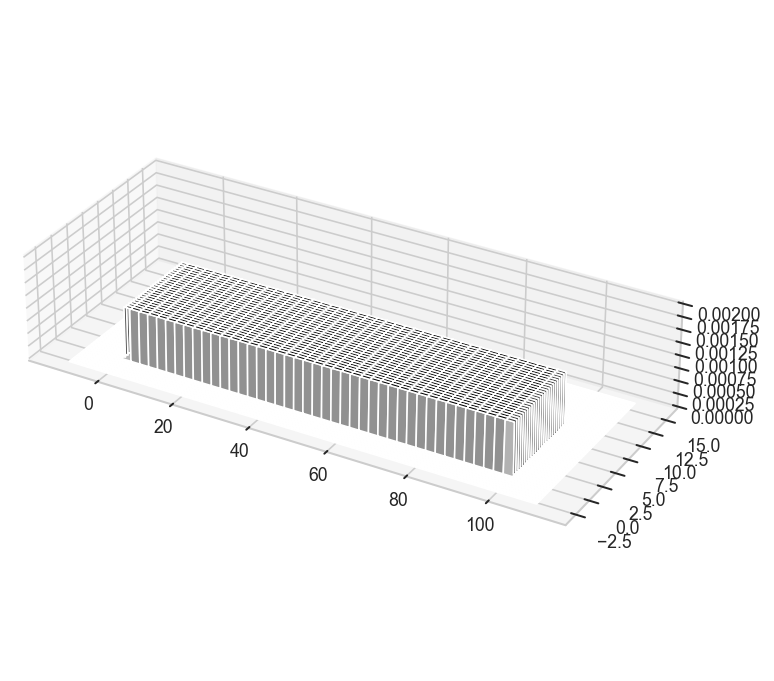

In [18]:
from mpl_toolkits.mplot3d import axes3d

fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111, projection='3d')

x = np.arange(-10,110,0.1)
y = np.arange(-3,16,0.1)
X,Y = np.meshgrid(x,y)
# Z = fU(X,Y)
# fUxy = fU(x[:,None], y[None,:])
fUxy = np.vectorize(fU)(X,Y)

# Plot a basic wireframe
# ax.plot_wireframe(X, Y, fUxy, rstride=10, cstride=20)
ax.plot_surface(X, Y, fUxy, cmap="Greys")#  rstride=10, cstride=20)
ax.set_box_aspect((10,4,2))
ax.set_zlim(0,0.002)
# ax.set_xlim(-10,130)
# ax.set_ylim(-1,13)
#ax.set_title('row step size 10, column step size 10')

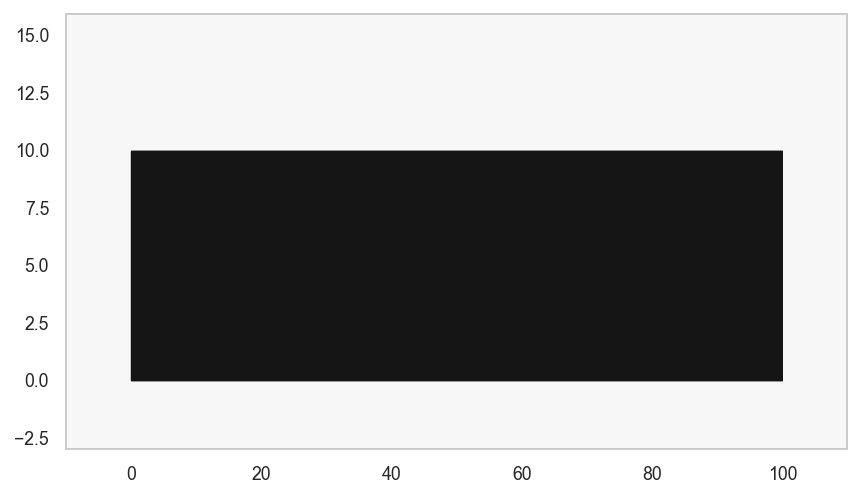

In [19]:
fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.contourf(X, Y, fUxy, cmap="Greys")

## Plots inspired by seaborn docs


In [21]:
from scipy.stats.distributions import norm

m = 700

# temperature is normally distrubted around 20 with std 2
rvT = norm(20,2)
ts = rvT.rvs(m)

# kombucha volume normally distr
meanN = 1000 + (ts-rvT.mean())*35
sigmaN = 75
rvN = norm(meanN, sigmaN)

ns = rvN.rvs(m)


# sns.displot(x=ns, y=ts)

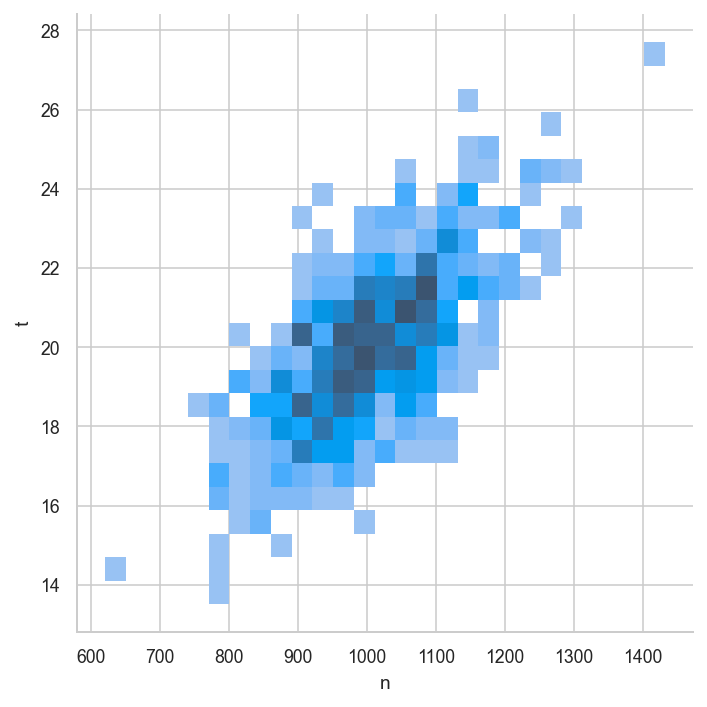

In [22]:
import pandas as pd
kprod = pd.DataFrame({"t":ts, "n":ns})
sns.displot(data=kprod, x="n", y="t")

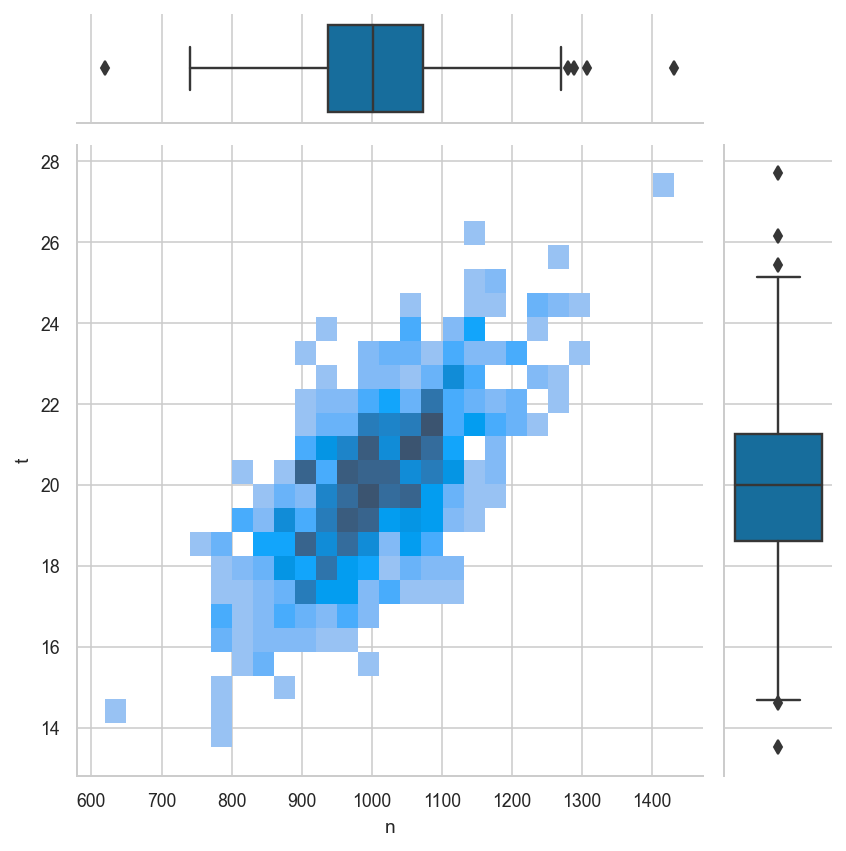

In [23]:
g = sns.JointGrid(data=kprod, x="n", y="t")
g.plot_joint(sns.histplot)
g.plot_marginals(sns.boxplot)


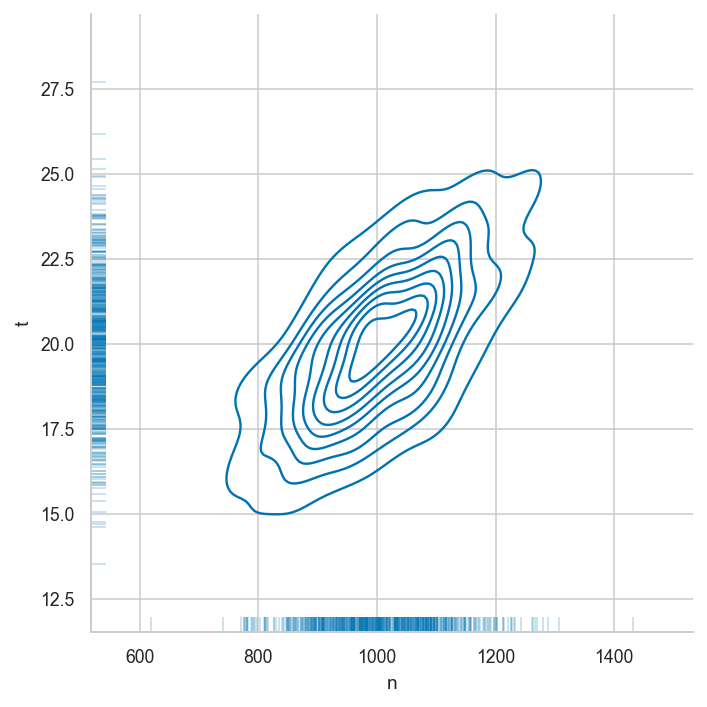

In [24]:
sns.displot(data=kprod, x="n", y="t", kind="kde",
            rug=True, rug_kws={"alpha":0.2})

### Coin tosses for n=100, n=1000, and n=10000

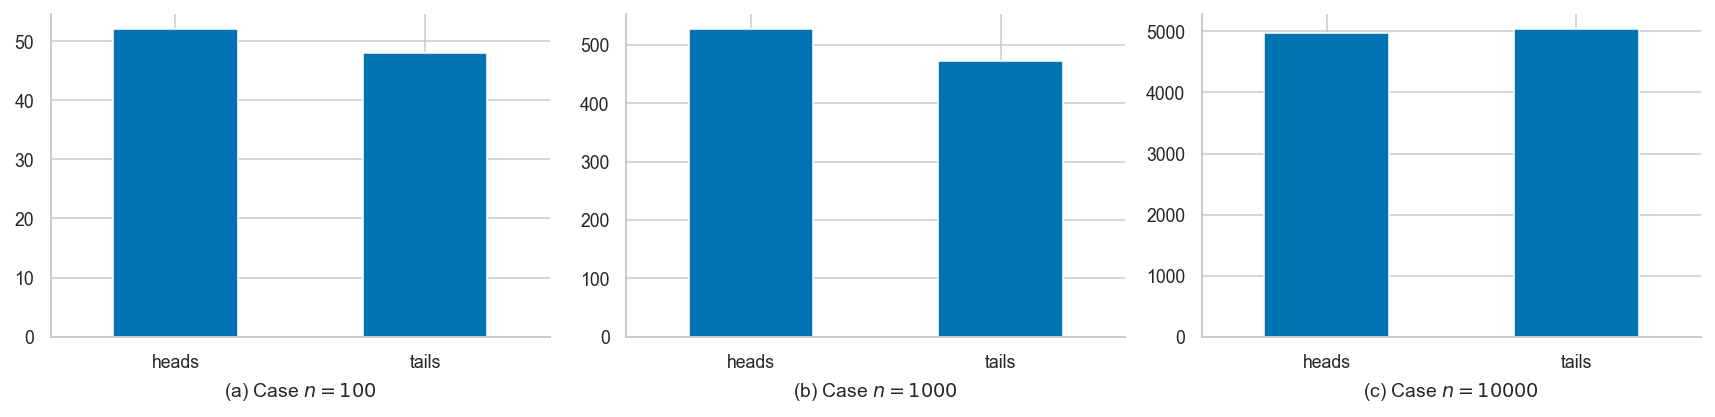

In [25]:
import numpy as np
np.random.seed(15)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import randint

rvC = randint(0, 2)


filename = "figures/panel_n_coin_flips.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 100
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 1000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 10000
    flips = rvC.rvs(n)
    s = pd.Series(flips).replace(1, "heads").replace(0, "tails")
    # print(f"Case {n=}")
    # print(s.value_counts().sort_index())
    s.value_counts().sort_index().plot(kind="bar", rot=0, ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)
    
    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)


### Dice rolls 600 6000 60000

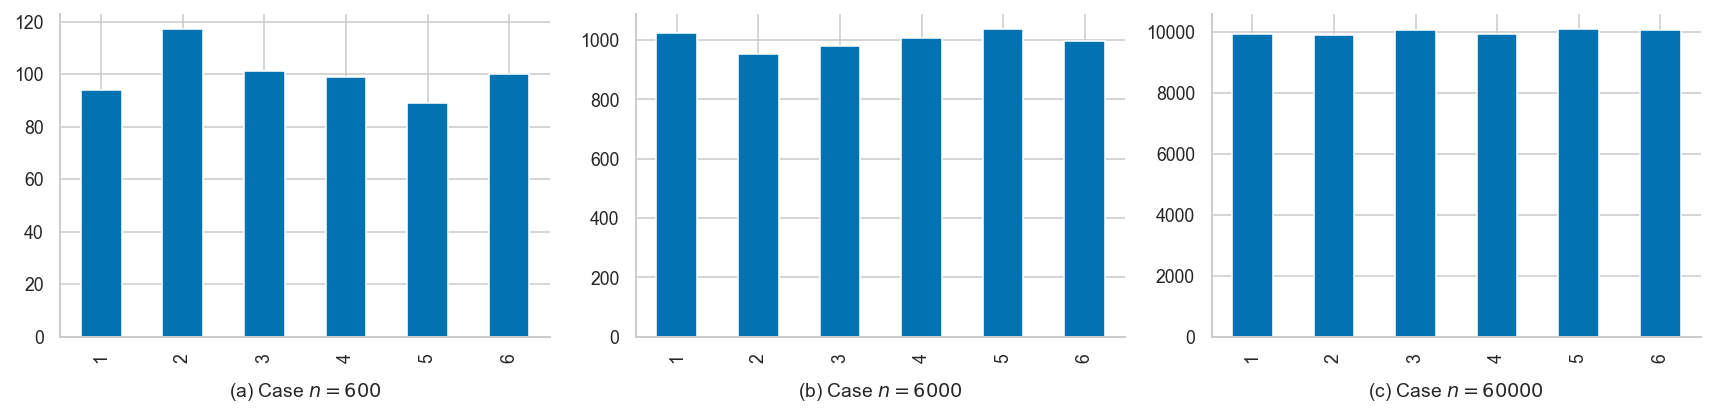

In [26]:
import numpy as np
np.random.seed(5)

import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.distributions import randint

rvD = randint(1, 7)


filename = "figures/panel_n_dice_rolls.pdf"


with plt.rc_context({"figure.figsize":(12,3)}):
    fig, axs = plt.subplots(1, 3)
    ax1, ax2, ax3 = axs

    n = 600
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax1)
    title1 = f"(a) Case $n={n}$"
    ax1.set_title(title1, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax1)

    n = 6000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax2)
    title2 = f"(b) Case $n={n}$"
    ax2.set_title(title2, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax2)

    n = 60000
    rolls = rvD.rvs(n)
    ds = pd.Series(rolls)
    # print(f"Case {n=}")
    # print(ds.value_counts().sort_index())
    ds.value_counts().sort_index().plot(kind="bar", ax=ax3)
    title3 = f"(c) Case $n={n}$"
    ax3.set_title(title3, y=0, pad=-30)
    sns.despine(top=True, right=True, ax=ax3)

    fig.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches="tight", pad_inches=0)
